<h1>CS464 Machine Learning </br>
Homework 2: PCA & Cats </br></h1>
<h3>Ece Kahraman </br>
21801879 </br></h3>

In [1]:
import numpy as np     
import os
from PIL import Image

In [2]:
images = []
image_count = 0

# You can change the path of your image directory.
# The path system considers the local files on your computer.
path = 'afhq_cat2'

# Path of the chosen image for the question 1.3
question_1_3_image = path + "\\flickr_cat_000003.jpg"

# Resizing and reshaping the images as the preprocess while saving them.
for file in os.listdir(path):
    img = Image.open(path + "\\" + file,mode="r").resize((64,64), Image.BILINEAR)
    images.append(np.asarray(img, dtype=int).reshape(4096,3))
    image_count += 1

In [3]:
X = np.zeros((5653,4096,3))

# Redirect the images to a numpy array X
for i in range (len(X)):
    X[i] = images[i]
    
X0 = X[:,:,0] # red channel
X1 = X[:,:,1] # green channel
X2 = X[:,:,2] # blue channel


In [4]:
# X0 PCA calculations

X0_mean = X0 - np.mean(X0, axis=0)
X0_covariance = np.dot(X0_mean.T, X0_mean) / image_count

X0_eigen_vals, X0_eigen_vecs = np.linalg.eig(X0_covariance)

X0_pc_vecs = X0_eigen_vecs[:,0:10]
X0_pc_vals = X0_eigen_vals[:10]


In [5]:
# X1 PCA calculations

X1_mean = X1 - np.mean(X1, axis=0)
X1_covariance = np.dot(X1_mean.T, X1_mean) / image_count

X1_eigen_vals, X1_eigen_vecs = np.linalg.eig(X1_covariance)

X1_pc_vecs = X1_eigen_vecs[:,0:10]
X1_pc_vals = X1_eigen_vals[:10]

In [6]:
# X2 PCA calculations

X2_mean = X2 - np.mean(X2, axis=0)
X2_covariance = np.dot(X2_mean.T, X2_mean) / image_count

X2_eigen_vals, X2_eigen_vecs = np.linalg.eig(X2_covariance)

X2_pc_vecs = X2_eigen_vecs[:,0:10]
X2_pc_vals = X2_eigen_vals[:10]

In [7]:
# Collection of necessary eigenvalues and eigenvectors for later uses.
eigens = {'eigen_vals': [X0_eigen_vals, X1_eigen_vals, X2_eigen_vals],
          'pc_vectors': [X0_pc_vecs, X1_pc_vecs, X2_pc_vecs],
          'pc_values': [X0_pc_vals, X1_pc_vals, X2_pc_vals] }

<h2>===== Question 1.1 =====</h2>

In [8]:
# PVE calculations:
# (sum of first k eigenvalues / sum of all eigenvalues) * 100

for i in range(0,3):
    k, explained_variance = 0, 0
    
    print("For the %s channel:\n" % ('red') if i == 0 else "For the %s channel:\n" % ('green') if i == 1 else "For the %s channel:\n" % ('blue')) 
    
    while explained_variance <= 70:
        k += 1
        if i == 0:
            explained_variance = 100 * (np.sum(X0_eigen_vals[:k])/ np.sum(eigens['eigen_vals'][i]))
        elif i == 1:
            explained_variance = 100 * (np.sum(X1_eigen_vals[:k])/ np.sum(eigens['eigen_vals'][i]))
        elif i == 2:
            explained_variance = 100 * (np.sum(X2_eigen_vals[:k])/ np.sum(eigens['eigen_vals'][i]))
        
        if k <= 10:    
           print("-with %d principal components PVE is %5.3f%%" % (k, explained_variance))
          
        
    print("We need to choose the first %d principal components to achieve at least 70%% PVE.\n\n" % (k) )
    
    
    

For the red channel:

-with 1 principal components PVE is 23.507%
-with 2 principal components PVE is 39.158%
-with 3 principal components PVE is 48.163%
-with 4 principal components PVE is 54.993%
-with 5 principal components PVE is 58.746%
-with 6 principal components PVE is 61.141%
-with 7 principal components PVE is 63.417%
-with 8 principal components PVE is 65.530%
-with 9 principal components PVE is 67.324%
-with 10 principal components PVE is 68.673%
We need to choose the first 12 principal components to achieve at least 70% PVE.


For the green channel:

-with 1 principal components PVE is 20.874%
-with 2 principal components PVE is 36.758%
-with 3 principal components PVE is 46.017%
-with 4 principal components PVE is 52.828%
-with 5 principal components PVE is 56.627%
-with 6 principal components PVE is 59.073%
-with 7 principal components PVE is 61.501%
-with 8 principal components PVE is 63.650%
-with 9 principal components PVE is 65.537%
-with 10 principal components PVE 

<h2>===== Question 1.2 =====</h2>

Cat image constructed from PC #1:


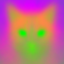

Cat image constructed from PC #2:


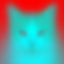

Cat image constructed from PC #3:


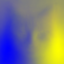

Cat image constructed from PC #4:


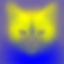

Cat image constructed from PC #5:


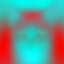

Cat image constructed from PC #6:


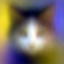

Cat image constructed from PC #7:


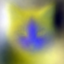

Cat image constructed from PC #8:


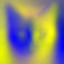

Cat image constructed from PC #9:


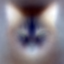

Cat image constructed from PC #10:


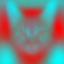

In [9]:
# A list of lists to restack the color channels
scaled_values = [ [], [], [] ]

for color_indicator in range(0,3):
    for k in range(10):
        # Get the transpose of the eigenvectors of the first 10 principal components and reshape to 64x64
        reshaped = np.reshape(eigens['pc_vectors'][color_indicator].T[k], (64, 64))
        
        # Min-Max Calculations:
        # (eigenvector - min of eigenvector) / (max of eigenvector - min of eigenvector)
        min_max_scaled = (reshaped - reshaped.min()) / (reshaped.max() - reshaped.min())
        scaled_values[color_indicator].append(min_max_scaled)

            
for i in range(10):
    
    # Move the channel arrays into the image array matching the color channels for every scaled eigenvector
    # Multiply the channel arrays with 255 to make the values of type float32
    image = np.zeros((64, 64, 3))
    for j in range(len(scaled_values)):
        image[:,:,j] = scaled_values[j][i]*255
    
    eigen_cat = Image.fromarray(image.astype(np.uint8))
    print("Cat image constructed from PC #%d:" % (i+1))
    display(eigen_cat)
    
    # You can uncomment this function if you need to save the images.
    # Images are saved into the directory where this python file is.
    # eigen_cat.save('eigen_cat{}.png'.format(i+1))

<h2>===== Question 1.3 =====</h2>

Reconstructed cat image with 1 principal components:


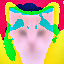

Reconstructed cat image with 50 principal components:


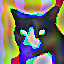

Reconstructed cat image with 250 principal components:


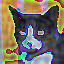

Reconstructed cat image with 500 principal components:


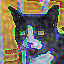

Reconstructed cat image with 1000 principal components:


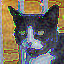

Reconstructed cat image with 4096 principal components:


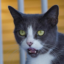

In [10]:
# Reshape the meaned arrays of each channels to 64x64
reshaped_means = [ (np.mean(X0, axis=0)).reshape(64, 64), 
                   (np.mean(X1, axis=0)).reshape(64, 64), 
                   (np.mean(X2, axis=0)).reshape(64, 64) ]

# Take the transpose of the eigenvectors of each channels
transposed_eigen_vecs = [ X0_eigen_vecs.T, X1_eigen_vecs.T, X2_eigen_vecs.T ] 

# Get the specific image and resize it to 64x64
original_img = Image.open(question_1_3_image ,mode="r").resize((64,64), Image.BILINEAR)
    
for k in [1, 50, 250, 500, 1000, 4096]:
    
    reconstructed_img = np.zeros((64,64,3))    
    temp = np.copy(original_img)  # For the subtraction of the means, otherwise the image is reconstructed falsely.
    reshaped_img_without_means = list()
    
    for z in range(3):
        temp[:,:,z] = temp[:,:,z] - reshaped_means[z]
        reshaped_img_without_means.append(temp[:,:,z].reshape(4096))
    
        for i in range(k):
            
            # Reconstruction of each eigenvector with the first k principal values:
            # channel + (channel - mean) T (transposed eigenvector of k pvs) T (transposed eigenvector of k pvs)            
            e = transposed_eigen_vecs[z][i]
            reconstructed_img[:,:,z] += np.dot(np.dot(np.array(reshaped_img_without_means)[z], e), e).reshape(64, 64)
        
        # Add the means of each channel back to the corresponding channel arrays
        reconstructed_img[:,:,z] = reconstructed_img[:,:,z] + reshaped_means[z]
    
    reconstructed_cat = Image.fromarray(reconstructed_img.astype(np.uint8))
    print("Reconstructed cat image with %d principal components:" % (k))
    display(reconstructed_cat)
    
    # You can uncomment this function if you need to save the images.
    # Images are saved into the directory where this python file is.
    # reconstructed_cat.save('reconstructed_cat_{}pcs.png'.format(k))
